In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN

In [ ]:
data=pd.read_csv('airlines.csv')

In [ ]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
data1=data.drop(['ID#'],axis=1)

In [ ]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [ ]:
data_norm=pd.DataFrame(normalize(data1),columns=data1.columns)
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


HIERACHICAL

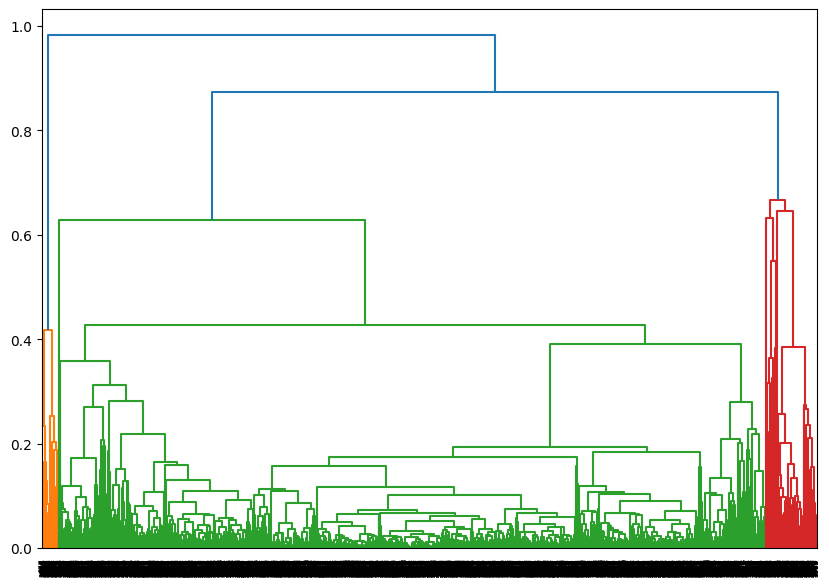

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram=sch.dendrogram(sch.linkage(data_norm,method='average'))

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [ ]:
hc.fit(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
y_hc=hc.fit_predict(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data1['cluster_id']=y_hc

In [ ]:
data1=data1.sort_values("cluster_id")
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2522,147090,0,4,1,1,35511,31,1800,16,2927,1,0
2523,79333,0,1,1,1,1500,3,1500,3,2977,0,0
2526,326704,0,4,1,1,37408,19,0,0,2962,0,0
2527,45149,0,1,1,1,21292,10,0,0,2949,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1000,0,1,1,1,0,0,0,0,4769,0,4
1363,200,0,1,1,1,200,1,200,1,5254,0,4
408,5581,0,1,1,1,0,0,0,0,8296,0,4
1387,1836,0,1,1,1,850,4,350,3,5329,0,4


In [ ]:
data1.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,85958.186325,163.835386,1.876215,1.012638,1.002916,13503.547959,11.000648,469.272197,1.402787,4043.470836,0.301685
1,1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444,0.717092
2,2,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774,1.000000
3,3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569,0.182741
4,4,1629.914286,0.000000,1.014286,1.000000,1.000000,652.228571,2.571429,42.142857,0.157143,4828.657143,0.171429


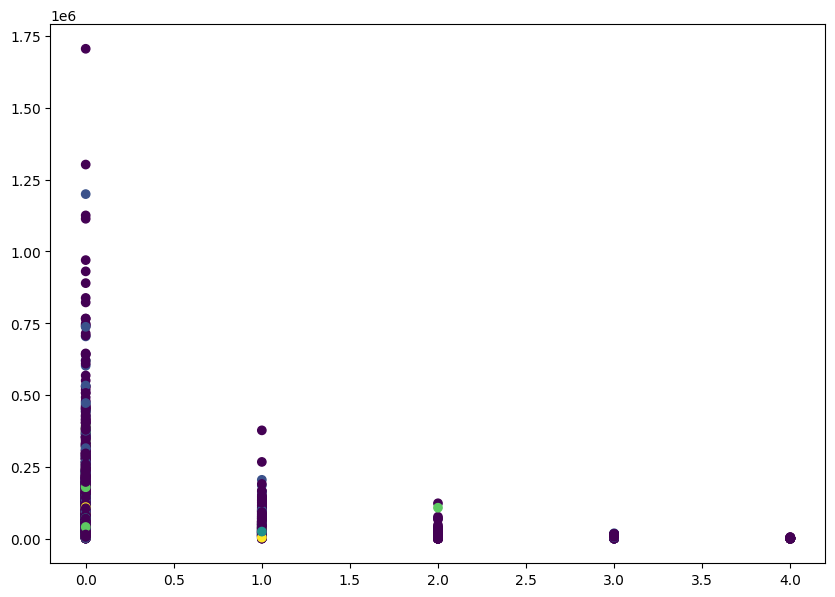

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data1['cluster_id'],data1['Balance'], c=hc.labels_)

kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'wcss')

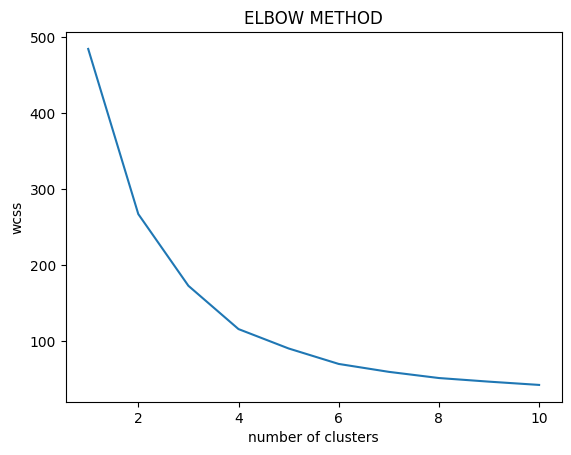

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("number of clusters")
plt.ylabel("wcss")

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=0)

In [ ]:
predict=kmeans.fit_predict(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
predict

array([0, 4, 0, ..., 2, 0, 4], dtype=int32)

In [ ]:
data1['kmeans_cluster_id']=predict

In [ ]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,kmeans_cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
2522,147090,0,4,1,1,35511,31,1800,16,2927,1,0,4
2523,79333,0,1,1,1,1500,3,1500,3,2977,0,0,0
2526,326704,0,4,1,1,37408,19,0,0,2962,0,0,4
2527,45149,0,1,1,1,21292,10,0,0,2949,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1000,0,1,1,1,0,0,0,0,4769,0,4,2
1363,200,0,1,1,1,200,1,200,1,5254,0,4,0
408,5581,0,1,1,1,0,0,0,0,8296,0,4,2
1387,1836,0,1,1,1,850,4,350,3,5329,0,4,0


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score_average = silhouette_score(data_norm, predict)
silhouette_score_average

0.5017141585441216

In [ ]:
silhouette_score_average1 = silhouette_score(data_norm, kmeans.predict(data_norm))
silhouette_score_average1

0.5017141585441216

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(data_norm)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data1['DBSCAN_cluster']=dbscan.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,kmeans_cluster_id,DBSCAN_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
2522,147090,0,4,1,1,35511,31,1800,16,2927,1,0,4,0
2523,79333,0,1,1,1,1500,3,1500,3,2977,0,0,0,0
2526,326704,0,4,1,1,37408,19,0,0,2962,0,0,4,0
2527,45149,0,1,1,1,21292,10,0,0,2949,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1000,0,1,1,1,0,0,0,0,4769,0,4,2,0
1363,200,0,1,1,1,200,1,200,1,5254,0,4,0,0
408,5581,0,1,1,1,0,0,0,0,8296,0,4,2,0
1387,1836,0,1,1,1,850,4,350,3,5329,0,4,0,0


In [ ]:
data1[data1['DBSCAN_cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,kmeans_cluster_id,DBSCAN_cluster
